In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
import glob
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [2]:
SEED = 50
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
def retrieveNormalGestureData(gestureNames):
    normal_list = []
    print()
    for gesture in gestureNames:
        normal_files = glob.glob(os.path.join("../Data/", gesture+"*.csv"))
        print(normal_files)
        for filename in normal_files:
            data = pd.read_csv(filename).dropna()
            normal_list.append(data)
    normal = pd.concat(normal_list)
    print()
    return normal

In [4]:
def retrieveGestureData(gestureName):
    normal_files = glob.glob(os.path.join("../Data/", gestureName+"*.csv"))
    print(normal_files)

    normal_list = []
    for filename in normal_files:
        data = pd.read_csv(filename).dropna()
        normal_list.append(data)

    normal = pd.concat(normal_list)
    return normal
    

### Retrieve Dataset

In [5]:
files = glob.glob(os.path.join("../Data/", "*.csv"))
print(files)
print(len(files))

['../Data\\backkick_0.csv', '../Data\\backkick_1.csv', '../Data\\backkick_2.csv', '../Data\\crouchpunch_0.csv', '../Data\\crouchpunch_1.csv', '../Data\\crouchpunch_2.csv', '../Data\\crouchpunch_3.csv', '../Data\\crouchslide_0.csv', '../Data\\crouch_0.csv', '../Data\\crouch_1.csv', '../Data\\crouch_2.csv', '../Data\\hadoken_0.csv', '../Data\\hardpunch_0.csv', '../Data\\hardpunch_1.csv', '../Data\\hardpunch_2.csv', '../Data\\highkick_0.csv', '../Data\\highkick_1.csv', '../Data\\highkick_2.csv', '../Data\\jump_0.csv', '../Data\\jump_1.csv', '../Data\\jump_2.csv', '../Data\\left_0.csv', '../Data\\left_1.csv', '../Data\\left_2.csv', '../Data\\left_3.csv', '../Data\\lightpunch_0.csv', '../Data\\normal_0.csv', '../Data\\normal_1.csv', '../Data\\normal_2.csv', '../Data\\normal_3.csv', '../Data\\normal_4.csv', '../Data\\right_0.csv', '../Data\\right_1.csv', '../Data\\right_2.csv', '../Data\\shoryuken_0.csv', '../Data\\tatsumaki_0.csv', '../Data\\uppercut_0.csv', '../Data\\uppercut_1.csv', '../D

In [6]:
left = retrieveGestureData("left_")
right = retrieveGestureData("right_")
jump = retrieveGestureData("jump_")
crouch = retrieveGestureData("crouch_")

hardpunch = retrieveGestureData("hardpunch_")
crouchpunch = retrieveGestureData("crouchpunch_")
uppercut = retrieveGestureData("uppercut_")

tatsumaki = retrieveGestureData("tatsumaki_")
hadoken = retrieveGestureData("hadoken_")

highkick = retrieveGestureData("highkick_")
crouchslide = retrieveGestureData("crouchslide_")

normal = retrieveNormalGestureData(["normal_","lightpunch_", "shoryuken_"])

['../Data\\left_0.csv', '../Data\\left_1.csv', '../Data\\left_2.csv', '../Data\\left_3.csv']
['../Data\\right_0.csv', '../Data\\right_1.csv', '../Data\\right_2.csv']
['../Data\\jump_0.csv', '../Data\\jump_1.csv', '../Data\\jump_2.csv']
['../Data\\crouch_0.csv', '../Data\\crouch_1.csv', '../Data\\crouch_2.csv']
['../Data\\hardpunch_0.csv', '../Data\\hardpunch_1.csv', '../Data\\hardpunch_2.csv']
['../Data\\crouchpunch_0.csv', '../Data\\crouchpunch_1.csv', '../Data\\crouchpunch_2.csv', '../Data\\crouchpunch_3.csv']
['../Data\\uppercut_0.csv', '../Data\\uppercut_1.csv', '../Data\\uppercut_2.csv']
['../Data\\tatsumaki_0.csv']
['../Data\\hadoken_0.csv']
['../Data\\highkick_0.csv', '../Data\\highkick_1.csv', '../Data\\highkick_2.csv']
['../Data\\crouchslide_0.csv']

['../Data\\normal_0.csv', '../Data\\normal_1.csv', '../Data\\normal_2.csv', '../Data\\normal_3.csv', '../Data\\normal_4.csv']
['../Data\\lightpunch_0.csv']
['../Data\\shoryuken_0.csv']



In [7]:
GESTURES = ["left","right","jump","crouch","hardpunch","crouchpunch","crouchslide","highkick","uppercut","tatsumaki","hadoken","normal"] 

# "backkick", "shoryuken","lightpunch",

#"crouchslide","highkick"

print(len(GESTURES))

12


In [10]:
jump.to_csv("../ModelTraining/jump.csv", index=False)
left.to_csv("../ModelTraining/left.csv", index=False)
right.to_csv("../ModelTraining/right.csv", index=False)
crouch.to_csv("../ModelTraining/crouch.csv", index=False)

crouchpunch.to_csv("../ModelTraining/crouchpunch.csv", index=False)
uppercut.to_csv("../ModelTraining/uppercut.csv", index=False)
hardpunch.to_csv("../ModelTraining/hardpunch.csv", index=False)

normal.to_csv("../ModelTraining/normal.csv", index=False)

highkick.to_csv("../ModelTraining/highkick.csv", index=False)

hadoken.to_csv("../ModelTraining/hadoken.csv", index=False)
tatsumaki.to_csv("../ModelTraining/tatsumaki.csv", index=False)

crouchslide.to_csv("../ModelTraining/crouchslide.csv", index=False)

# shoryuken.to_csv("../ModelTraining/shoryuken.csv", index=False)
# lightpunch.to_csv("../ModelTraining/lightpunch.csv", index=False)
# backkick.to_csv("../ModelTraining/backkick.csv", index=False)

C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2593439547.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, jump['aX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2593439547.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, jump['aY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2593439547.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, jump['aZ'], 'r.', label='z', linestyle='solid', marker=',')


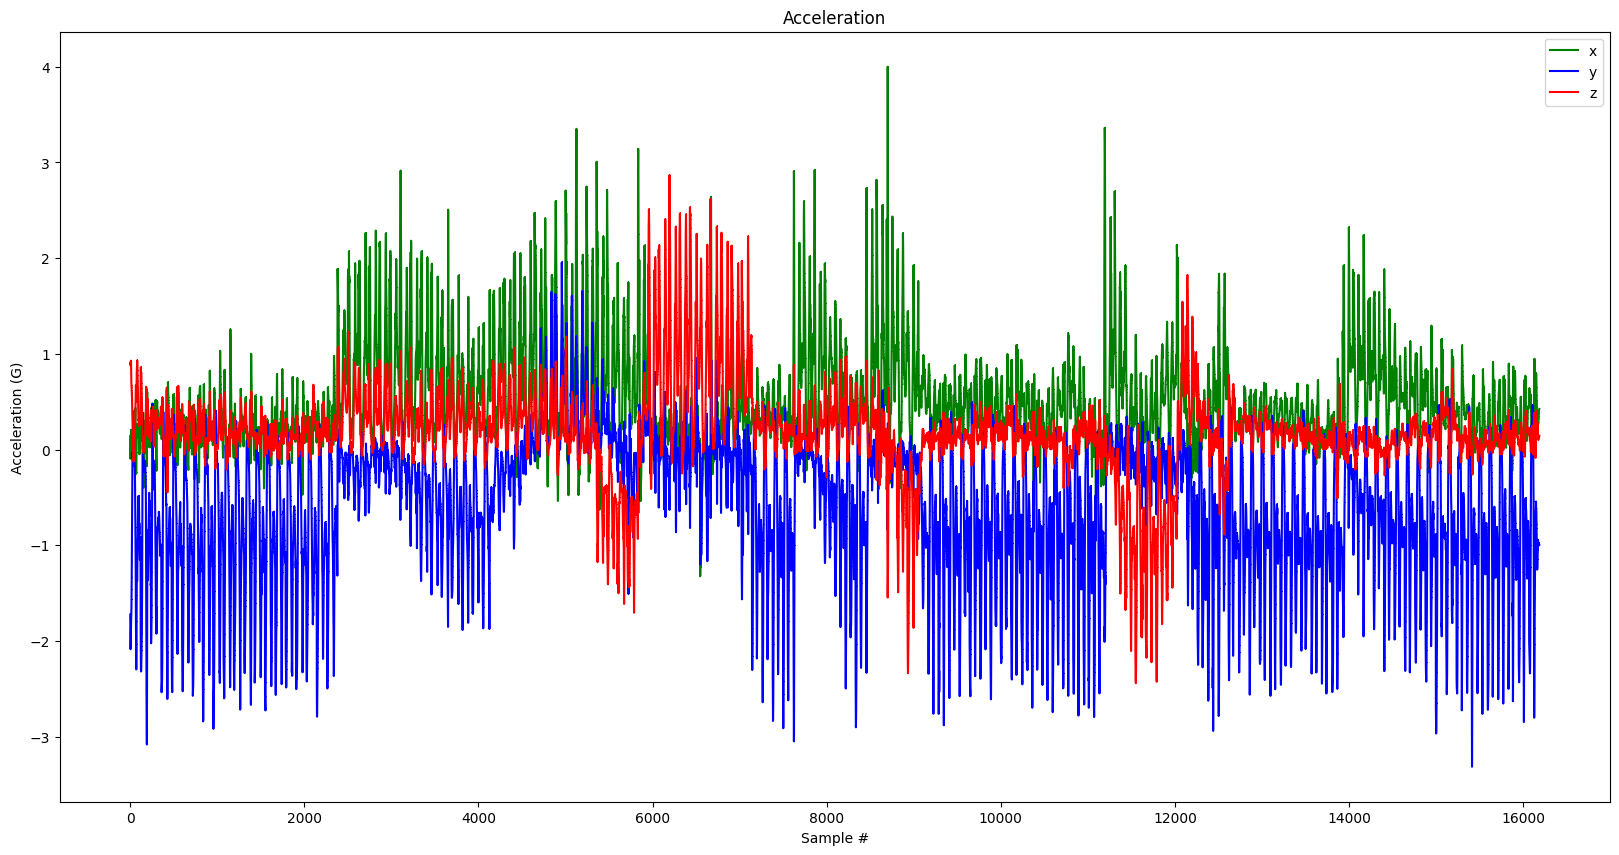

C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2593439547.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, jump['gX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2593439547.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, jump['gY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2593439547.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, jump['gZ'], 'r.', label='z', linestyle='solid', marker=',')


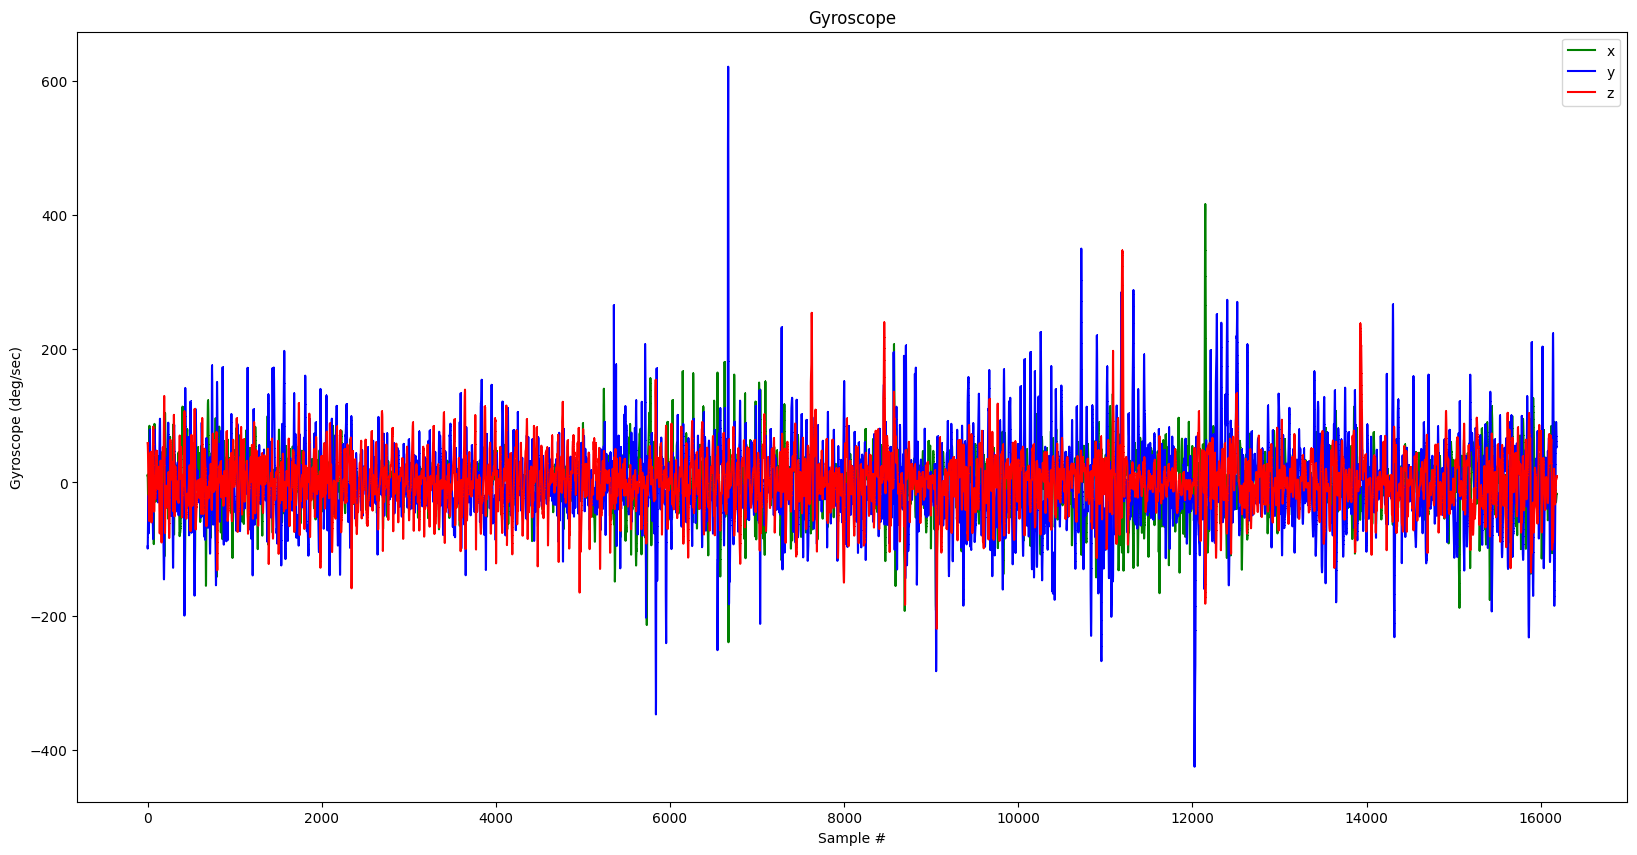

In [11]:
index = range(1, len(jump['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, jump['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, jump['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, jump['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, jump['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, jump['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, jump['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2437505363.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, uppercut['aX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2437505363.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, uppercut['aY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2437505363.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, uppercut['aZ'], 'r.', label='z', linestyle='solid', marker=',')


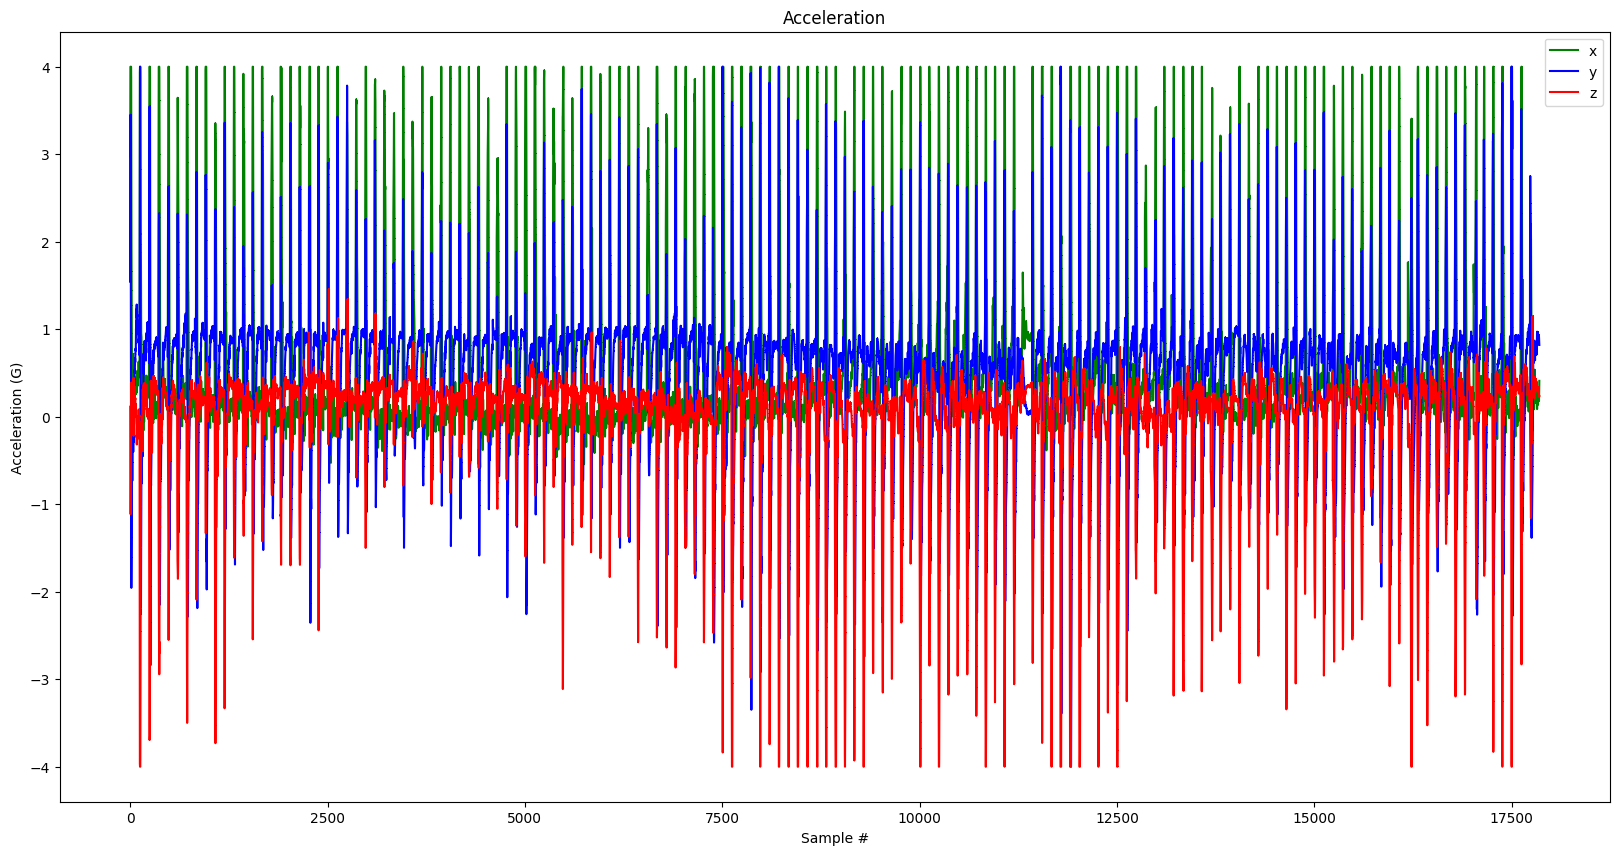

C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2437505363.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, uppercut['gX'], 'g.', label='x', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2437505363.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, uppercut['gY'], 'b.', label='y', linestyle='solid', marker=',')
C:\Users\chock\AppData\Local\Temp\ipykernel_13856\2437505363.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, uppercut['gZ'], 'r.', label='z', linestyle='solid', marker=',')


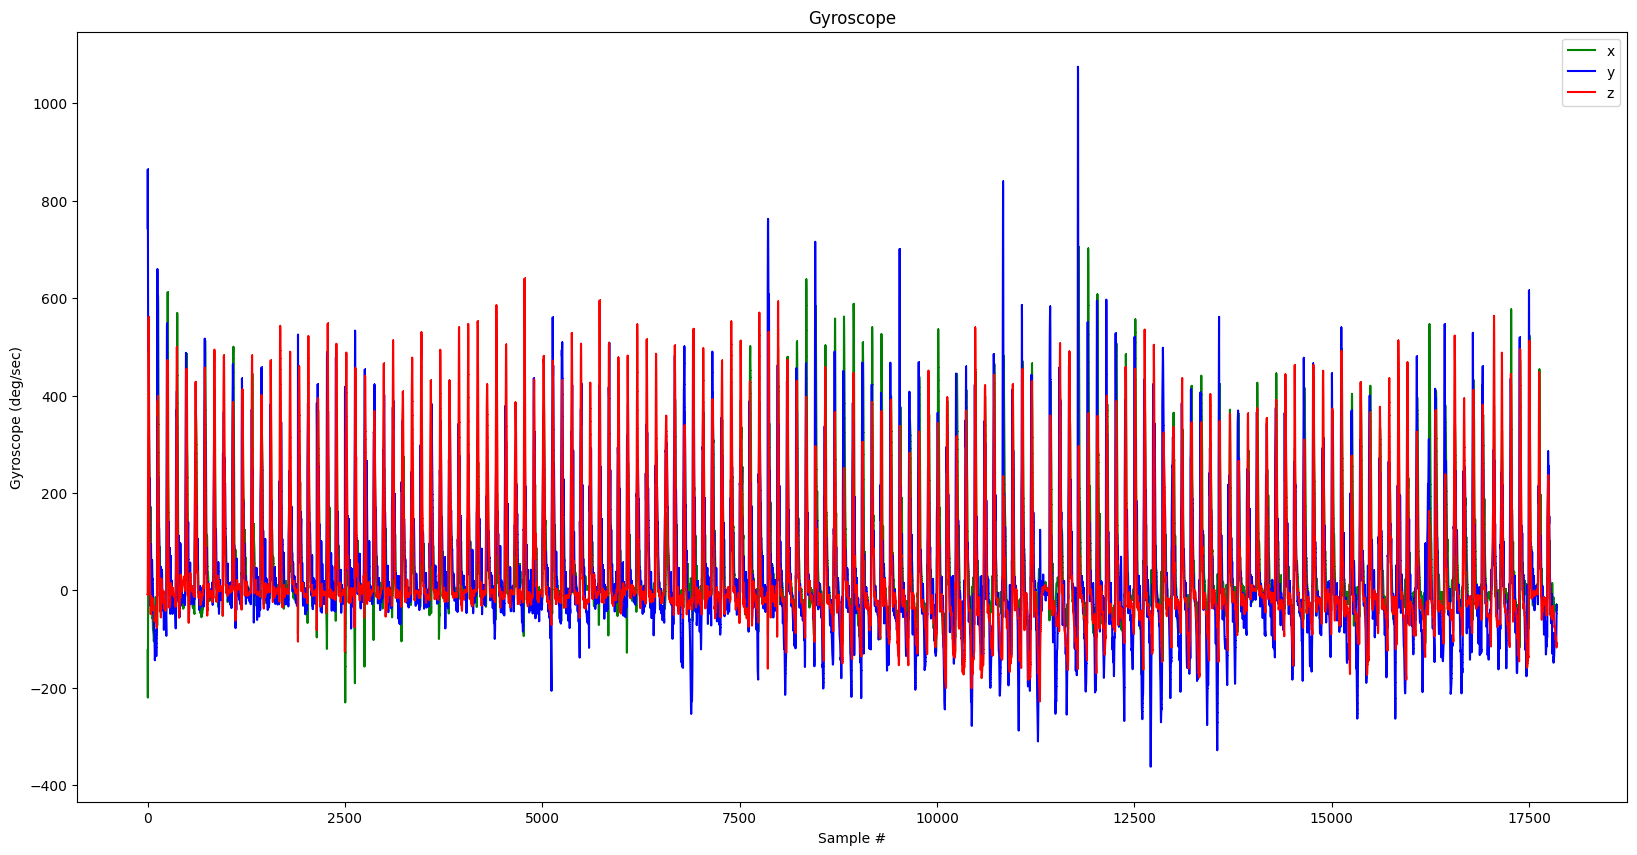

In [12]:
index = range(1, len(uppercut['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, uppercut['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, uppercut['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, uppercut['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, uppercut['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, uppercut['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, uppercut['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

In [13]:

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)
print(NUM_GESTURES)
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)
print(ONE_HOT_ENCODED_GESTURES)

inputs = []
outputs = []

for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")
    
    output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
    df = pd.read_csv(gesture + ".csv")
    print(df.shape)

    # calculate the number of gesture recordings in the file
    num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

    print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
    
    for i in range(num_recordings):
        tensor = []
        for j in range(SAMPLES_PER_GESTURE):
            index = i * SAMPLES_PER_GESTURE + j
            # normalize the input data, between 0 to 1:
            # - acceleration is between: -4 to +4
            # - gyroscope is between: -2000 to +2000
            tensor += [
              (df['aX'][index] + 4) / 8,
              (df['aY'][index] + 4) / 8,
              (df['aZ'][index] + 4) / 8,
              (df['gX'][index] + 2000) / 4000,
              (df['gY'][index] + 2000) / 4000,
              (df['gZ'][index] + 2000) / 4000
            ]

        inputs.append(tensor)
        outputs.append(output)
    
# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

12
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Processing index 0 for gesture 'left'.
(19635, 6)
	There are 165 recordings of the left gesture.
Processing index 1 for gesture 'right'.
(17136, 6)
	There are 144 recordings of the right gesture.
Processing index 2 for gesture 'jump'.
(16184, 6)
	There are 136 recordings of the jump gesture.
Processing index 3 for gesture 'crouch'.
(15827, 6)
	There are 133 recordings of the crouch gesture.
Processing index 4 for gesture 'hardpunch'.
(17255, 6)
	There are 145 recordings of the hardpunch gesture.
Processing index 5 for gest

In [14]:
inputs.shape

(2240, 714)

### Splitting Data

In [15]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.7 * num_inputs)
TEST_SPLIT = int(0.15 * num_inputs + TRAIN_SPLIT)

x_train, x_test, x_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
Y_train, Y_test, Y_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)

(1568, 714)
(336, 714)
(336, 714)


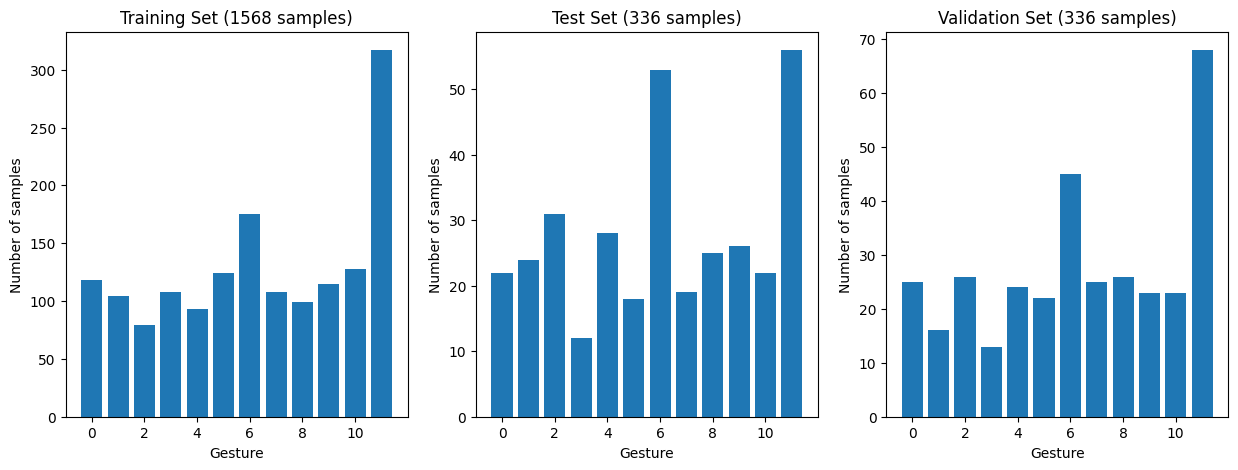

In [17]:
import matplotlib.pyplot as plt

# Calculate the number of samples in each set
train_size = x_train.shape[0]
test_size = x_test.shape[0]
validate_size = x_validate.shape[0]

# Calculate the number of samples for each gesture in each set
train_counts = np.sum(Y_train, axis=0)
test_counts = np.sum(Y_test, axis=0)
validate_counts = np.sum(Y_validate, axis=0)

# Plot the distribution of samples for each gesture in each set
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.bar(range(NUM_GESTURES), train_counts)
ax1.set_title('Training Set ({} samples)'.format(train_size))
ax1.set_xlabel('Gesture')
ax1.set_ylabel('Number of samples')

ax2.bar(range(NUM_GESTURES), test_counts)
ax2.set_title('Test Set ({} samples)'.format(test_size))
ax2.set_xlabel('Gesture')
ax2.set_ylabel('Number of samples')

ax3.bar(range(NUM_GESTURES), validate_counts)
ax3.set_title('Validation Set ({} samples)'.format(validate_size))
ax3.set_xlabel('Gesture')
ax3.set_ylabel('Number of samples')

plt.show()


### Model Training

In [18]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

In [19]:
Streetfighter_model = tf.keras.Sequential()
Streetfighter_model.add(tf.keras.layers.Dense(64, activation='relu'))
Streetfighter_model.add(tf.keras.layers.Dropout(0.1))
Streetfighter_model.add(tf.keras.layers.Dense(64, activation='relu'))
Streetfighter_model.add(tf.keras.layers.Dropout(0.1))
Streetfighter_model.add(tf.keras.layers.Dense(32, activation='relu'))
Streetfighter_model.add(tf.keras.layers.Dropout(0.1))
Streetfighter_model.add(tf.keras.layers.Dense(32, activation='relu'))
Streetfighter_model.add(tf.keras.layers.Dropout(0.1))
Streetfighter_model.add(tf.keras.layers.Dense(16, activation='relu'))
Streetfighter_model.add(tf.keras.layers.Dropout(0.1))
Streetfighter_model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
Streetfighter_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [20]:
# Streetfighter_model = tf.keras.Sequential()
# Streetfighter_model.add(tf.keras.layers.Dense(256, activation='relu'))
# Streetfighter_model.add(tf.keras.layers.Dropout(0.3))
# Streetfighter_model.add(tf.keras.layers.Dense(128, activation='relu'))
# Streetfighter_model.add(tf.keras.layers.Dropout(0.2))
# Streetfighter_model.add(tf.keras.layers.Dense(64, activation='relu'))
# Streetfighter_model.add(tf.keras.layers.Dropout(0.1))
# Streetfighter_model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
# Streetfighter_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
history_1 = Streetfighter_model.fit(x_train, Y_train, epochs=3000,batch_size=1,validation_data=(x_validate,Y_validate), callbacks=[early_stopping])

Epoch 1/3000
1568/1568 [==============================] - 3s 1ms/step - loss: 0.0760 - mae: 0.1517 - val_loss: 0.0748 - val_mae: 0.1505
Epoch 2/3000
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0753 - mae: 0.1505 - val_loss: 0.0743 - val_mae: 0.1502
Epoch 3/3000
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0741 - mae: 0.1488 - val_loss: 0.0706 - val_mae: 0.1453
Epoch 4/3000
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0707 - mae: 0.1430 - val_loss: 0.0681 - val_mae: 0.1332
Epoch 5/3000
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0684 - mae: 0.1383 - val_loss: 0.0660 - val_mae: 0.1297
Epoch 6/3000
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0680 - mae: 0.1370 - val_loss: 0.0650 - val_mae: 0.1329
Epoch 7/3000
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0670 - mae: 0.1347 - val_loss: 0.0650 - val_mae: 0.1333
Epoch 8/3000
1568/1568 [========================

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1,len(loss)+1)

In [ ]:
SKIP = 0
plt.plot(epochs[SKIP:],loss[SKIP:],'g.', label ='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b.', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
mae = history_1.history['mae']
val_mae =history_1.history['val_mae']

plt.plot(epochs[SKIP:],mae[SKIP:],'g.', label ='Training MAE')
plt.plot(epochs[SKIP:],val_mae[SKIP:],'b.', label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# use the model to predict the test inputs
predictions = Streetfighter_model.predict(x_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", Y_test)


# count the total number of accurate predictions

correct = 0
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == np.argmax(Y_test[i]):
        correct += 1

print(f"Accuracy: {correct / len(predictions)}")

In [ ]:
GESTURES

In [ ]:
NUM_GESTURES

In [ ]:
predictions = Streetfighter_model.predict(x_test)

# initialize a dictionary to store the counts of each gesture's correct and incorrect predictions
gesture_counts = {i: {"correct": 0, "incorrect": 0, "total": 0} for i in range(NUM_GESTURES)}
gesture_counts["total"] = {"correct": 0, "incorrect": 0, "total": len(predictions)}

# loop through the predictions and the expected outputs
for i in range(len(predictions)):
    predicted_gesture = np.argmax(predictions[i])
    actual_gesture = np.argmax(Y_test[i])
    
    # increment the correct or incorrect count for the predicted gesture
    if predicted_gesture == actual_gesture:
        gesture_counts[actual_gesture]["correct"] += 1
        gesture_counts["total"]["correct"] += 1
        gesture_counts[actual_gesture]["total"] += 1  # move this line inside the if statement
    else:
        gesture_counts[actual_gesture]["incorrect"] += 1
        gesture_counts["total"]["incorrect"] += 1
        gesture_counts[actual_gesture]["total"] += 1  # move this line inside the else statement

# print the counts for each gesture and the total
for gesture, counts in gesture_counts.items():
    if gesture == "total":
        print(f"Total: Correct = {counts['correct']}, Incorrect = {counts['incorrect']}, Total = {counts['total']}")
    else:
        print(f"Gesture {gesture}|| {GESTURES[gesture]} : Correct = {counts['correct']}, Incorrect = {counts['incorrect']}, Total = {counts['total']}")

# calculate and print the overall accuracy
accuracy = gesture_counts["total"]["correct"] / gesture_counts["total"]["total"]
print(f"Overall accuracy: {accuracy:.2%}")


### ConvertToTensorFlowLite

In [ ]:
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value,dtype =np.float32,ndmin=2)]

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(Streetfighter_model)
GestureCapture_model_tflite = converter.convert()
open("GestureCapture_model.tflite","wb").write(GestureCapture_model_tflite)

converter = tf.lite.TFLiteConverter.from_keras_model(Streetfighter_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_generator

GestureCapture_model_tflite_quantized = converter.convert()
open("GestureCapture_model_quantized.tflite","wb").write(GestureCapture_model_tflite_quantized)

In [ ]:
basic_model_size = os.path.getsize("GestureCapture_model.tflite")
print("Model is %d bytes" % basic_model_size)
basic_model_size = os.path.getsize("GestureCapture_model_quantized.tflite")
print("Model is %d bytes" % basic_model_size)

### Testing with Quantized Model

In [ ]:
# load the TFLite model
interpreter = tf.lite.Interpreter(model_path="GestureCapture_model_quantized.tflite")
interpreter.allocate_tensors()

# get the input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# create arrays to store the predictions and actual outputs
predictions = np.zeros((len(x_test), NUM_GESTURES))
final_Y_test = np.zeros((len(x_test), NUM_GESTURES))

# loop through the test data and run inference on each example
for i in range(len(x_test)):
    # set the input data
    interpreter.set_tensor(input_details[0]['index'], np.array([x_test[i]], dtype=np.float32))
    
    # run the inference
    interpreter.invoke()
    
    # get the output and store it in the predictions array
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predictions[i] = output_data
    
    # store the actual output in the final_Y_test array
    final_Y_test[i] = Y_test[i]

# calculate the accuracy
correct = 0
gesture_correct = [0] * NUM_GESTURES
gesture_total = [0] * NUM_GESTURES

for i in range(len(predictions)):
    if np.argmax(predictions[i]) == np.argmax(final_Y_test[i]):
        correct += 1
        gesture_correct[np.argmax(predictions[i])] += 1
    gesture_total[np.argmax(Y_test[i])] += 1

accuracy = correct / len(predictions)

print(f"Overall Accuracy: {accuracy:.2%}")
for i in range(NUM_GESTURES):
    print(f"Gesture {i} || {GESTURES[i]} : {gesture_correct[i]}/{gesture_total[i]} ({gesture_correct[i]/gesture_total[i]:.2%})")

### Convert to Hex File

In [ ]:
def hex_to_c_array(hex_data, var_name):

    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'

    # Add array length at top of file
    c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'unsigned char ' + var_name + '[] = {'
    hex_array = []
    for i, val in enumerate(hex_data) :

        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add formatting so each line stays within 80 characters
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

In [ ]:
model_tflite_file = open('GestureCapture_model_quantized.tflite','rb')
model_tflite = model_tflite_file.read()
with open('GestureCapture_model_quantized.h','w') as file:
    file.write(hex_to_c_array(model_tflite,'GestureCapture_model_quantized'))